# scATAC-seq Fragment Analysis

In [107]:
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [21]:
input_fragment_file = "/Users/caz3so/scratch/20210820_maxATAC_scATAC_Granja2021/processed/fragments_Granja2021_MCF7.tsv"

In [103]:
class FragmentStats(object):
    def __init__(self,
                 input_fragment_file):
        self.input_fragment_file = input_fragment_file
        
        self.__import_fragment_df__()
        
        self.number_of_fragments = self.df.shape[0]
    
        self.__get_unique_fragments__()
        self.__get_unique_barcodes__()
    
    def __import_fragment_df__(self):
        AUTOSOMAL_CHRS = ["chr1", "chr2", "chr3", "chr4", "chr5", "chr6",
                  "chr7", "chr8", "chr9", "chr10", "chr11", "chr12",
                  "chr13", "chr14", "chr15", "chr16", "chr17", "chr18",
                  "chr19", "chr20", "chr21", "chr22"
                  ]
        
        df = pd.read_table(self.input_fragment_file, header=None, names=["chr", "start", "stop", "barcode", "readSupport"])
        
        self.df = df[df["chr"].isin(AUTOSOMAL_CHRS)]
    
    def __get_unique_barcodes__(self):
        tmp_gb = self.df.groupby(["barcode"]).count()
        
        self.number_barcodes = tmp_gb.shape[0]
        
        
    def __get_unique_fragments__(self):
        tmp_gb = self.df.groupby(["chr", "start", "stop"]).count()

        self.unique_fragments = tmp_gb.shape[0]
        
    def generate_tn5_sites(self, slop_size):  
        temp_df_left = pd.concat([self.df["chr"], self.df['start']], axis=1)
        temp_df_right = pd.concat([self.df["chr"], self.df['stop']], axis=1)
        temp_df_right.columns = ["chr", "start"]
         
        expanded_df = pd.concat([temp_df_left, temp_df_right])
        
        expanded_df["start"] = expanded_df["start"] - slop_size
        
        # BED coordinates are 0 start half open coordinates
        expanded_df["stop"] = expanded_df["start"] + (slop_size*2) + 1
        
        self.tn5_df = expanded_df
    
    def write_tn5_bed(self, output_filename):
        self.tn5_df.to_csv(output_filename, sep="\t", index=False, header=False)

In [115]:
for frag_file in glob.glob("/Users/caz3so/scratch/20210820_maxATAC_scATAC_Granja2021/processed/*.tsv"):
    basename = os.path.basename(frag_file).split("_")[2].replace(".tsv", "")
    stats = FragmentStats(frag_file)
    stats.generate_tn5_sites(20)
    stats.write_tn5_bed(os.path.join("/Users/caz3so/scratch/20210820_maxATAC_scATAC_Granja2021/tn5_sites", basename + "_scATAC.bed"))

In [45]:
stats.number_of_fragments

2036650

In [47]:
stats.number_barcodes

1208

In [105]:
stats.generate_tn5_sites(20)

In [89]:
stats.df["length"] = stats.df["stop"] - stats.df["start"]

In [90]:
stats.tn5_df['length']

KeyError: 'length'

In [91]:
stats.df

,chr,start,stop,barcode,readSupport,length
0,chr1,86795,87219,CGCTATCTCCCACTTG-1,1,424
1,chr1,183983,184189,CTGAATGTCTCTGACC-1,1,206
2,chr1,599183,599345,TGCCTCATCGTGCTTC-1,3,162
3,chr1,629842,629960,TTGCTATAGTTCAGGG-1,3,118
4,chr1,629913,629964,TGTAAGCGTCATGAGG-1,1,51
...,...,...,...,...,...,...
2036645,chr22,50775383,50775433,GCGAGTCGTAGGTCTT-1,2,50
2036646,chr22,50780282,50780575,CTAACTTAGCTCGGCT-1,1,293
2036647,chr22,50783405,50783603,CAAGCTACAATGACTC-1,1,198
2036648,chr22,50783588,50783831,TGTAGCAGTTACTTTC-1,1,243


In [101]:
stats.df["length"].min()

14

In [98]:
plt.kde(stats.df["length"])

AttributeError: module 'matplotlib.pyplot' has no attribute 'kde'

/Users/caz3so/anaconda3/envs/maxatac/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

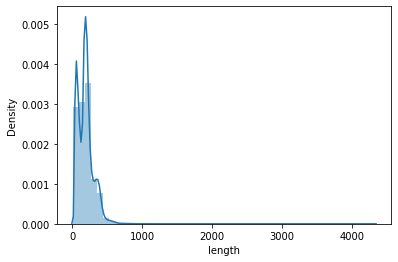

In [100]:
sns.distplot(stats.df["length"])